# Songs clustering
We previously built a songs dataset composed of 4 dimensions (frequency,popularity,median,mean),for a computational reasons we are going to use a subset of the songs for our study. To avoid choosing the songs randomly, we are going to perform a clustering and for each cluster we will choose a subset based on a percentage that we will define later. This will allow us to have some balance of the nature of the songs(popular,unknown...).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
import tqdm
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

In [2]:
def load_data():
    data = pd.read_csv("data/songs.csv",
                       names=["song_id","frequency","popularity","std","mean","median"],
                       header= 0,
                       encoding="utf-8")
    return data

In [7]:
def scale_data(cluster = None):
    
    if cluster is not None:
        
        scaled_data = cluster.copy()
        
        scaled_data['frequency']=preprocessing.scale(scaled_data['frequency'].astype('float64'))
        scaled_data['popularity']=preprocessing.scale(scaled_data['popularity'].astype('float64'))
        scaled_data['mean']=preprocessing.scale(scaled_data['mean'].astype('float64'))
        #scaled_data['std']=preprocessing.scale(scaled_data['std'].astype('float64'))
        scaled_data['median']=preprocessing.scale(scaled_data['median'].astype('float64'))
        
    return scaled_data



def split_data(data = None):
    if data is not None:
        train, test = train_test_split(data, test_size=.3, random_state=123)
    
    return train, test


def elbow_method(clus_train):
        
        clusters = range(1,10)
        meandist = []
        print("Performing elbow method...")
        for k in clusters:
            model = KMeans(n_clusters = k)
            model.fit(clus_train)
            clusassign = model.predict(clus_train)
            meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
            / clus_train.shape[0])
            
        return meandist

def plot_elbow_graph(dist):
    plt.plot(range(1,10), dist)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average distance')
    plt.title('Selecting k with the Elbow Method')
    plt.show()
    

def perform_pca(data):
    pca_2 = PCA(2)
    res = pca_2.fit_transform(clus_train)
    return res

def plot_clusters(pca_res,model):
    plt.scatter(x=pca_res[:,0], y=pca_res[:,1], c=model.labels_,)
    plt.xlabel('Canonical variable 1')
    plt.ylabel('Canonical variable 2')
    plt.title('Scatterplot of Canonical Variables for  3 Clusters')
    plt.show()



        

Loading the data....
splitting data...
Performing elbow method...


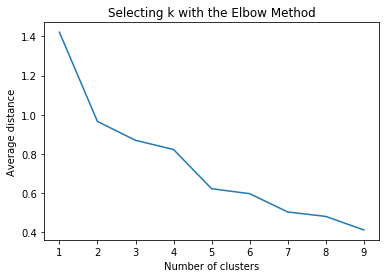

In [8]:
print("Loading the data....")
data = load_data()

data = data[["frequency","popularity","mean","median"]]
data['frequency'] = pd.to_numeric(data['frequency'], errors='coerce')
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')
data['mean'] = pd.to_numeric(data['mean'], errors='coerce')
data['median'] = pd.to_numeric(data['median'], errors='coerce')
#data['std'] = pd.to_numeric(data['std'], errors='coerce')

scalled_data = scale_data(data)

print("splitting data...")
#train, test  = split_data(scalled_data)

dist = elbow_method(scalled_data)

plot_elbow_graph(dist)

## clustering

In [9]:
model3 = KMeans(n_clusters=3)
model3.fit(scalled_data)
clusassign = model3.predict(scalled_data)

## PCA

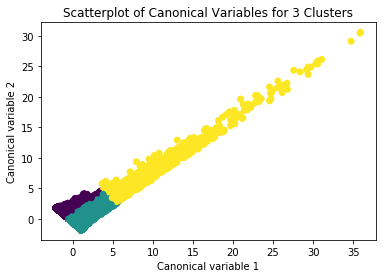

In [10]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plt.figure()
plot_columns = pca_2.fit_transform(scalled_data)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

## Recontructing the dataframe with the clusters label

In [11]:
scalled_data.reset_index(level=0, inplace=True)

cluslist = list(scalled_data['index'])

labels = list(model3.labels_)

newlist = dict(zip(cluslist, labels))

In [27]:
newclus = pd.DataFrame.from_dict(newlist, orient='index')
newclus.columns = ['cluster']
newclus.reset_index(level=0, inplace=True)
merged_train = pd.merge(scalled_data, newclus, on='index')
merged_train.head(n=10)

,index,frequency,popularity,mean,median,cluster
0,0,-0.195194,-0.207087,-0.381791,-0.234878,1
1,1,-0.250163,-0.253506,-0.661902,-0.604758,0
2,2,-0.213517,-0.176141,1.672357,1.244642,1
3,3,0.043004,-0.036883,-0.558157,-0.604758,0
4,4,-0.250163,-0.232875,1.205506,0.874762,1
5,5,-0.250163,-0.243191,0.271802,0.135002,1
6,6,-0.121902,-0.140037,-0.195050,-0.234878,1
7,7,-0.213517,-0.181298,1.438931,1.244642,1
8,8,-0.213517,-0.201929,0.505228,0.874762,1
9,9,-0.250163,-0.238033,0.738654,0.504882,1


In [29]:
data_copy=pd.DataFrame(data)
data_copy.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(data_copy, merged_train, on='index')

ValueError: cannot insert level_0, already exists

In [24]:
merged_train_all


,level_0,index,frequency_x,popularity_x,mean_x,median_x,frequency_y,popularity_y,mean_y,median_y,cluster
0,0,0,5,14,2.800000,3.0,-0.195194,-0.207087,-0.381791,-0.234878,1
1,1,1,2,5,2.500000,2.5,-0.250163,-0.253506,-0.661902,-0.604758,0
2,2,2,4,20,5.000000,5.0,-0.213517,-0.176141,1.672357,1.244642,1
3,3,3,18,47,2.611111,2.5,0.043004,-0.036883,-0.558157,-0.604758,0
4,4,4,2,9,4.500000,4.5,-0.250163,-0.232875,1.205506,0.874762,1
5,5,5,2,7,3.500000,3.5,-0.250163,-0.243191,0.271802,0.135002,1
6,6,6,9,27,3.000000,3.0,-0.121902,-0.140037,-0.195050,-0.234878,1
7,7,7,4,19,4.750000,5.0,-0.213517,-0.181298,1.438931,1.244642,1
8,8,8,4,15,3.750000,4.5,-0.213517,-0.201929,0.505228,0.874762,1
9,9,9,2,8,4.000000,4.0,-0.250163,-0.238033,0.738654,0.504882,1


In [25]:
merged_train_all = merged_train_all.drop(columns=["index","frequency_y","popularity_y","mean_y","median_y"]).rename(columns={"frequency_x":"frequency","popularity_x":"popularity","mean_x":"mean","median_x":"median"})
merged_train_all.head(10)

,level_0,frequency,popularity,mean,median,cluster
0,0,5,14,2.800000,3.0,1
1,1,2,5,2.500000,2.5,0
2,2,4,20,5.000000,5.0,1
3,3,18,47,2.611111,2.5,0
4,4,2,9,4.500000,4.5,1
5,5,2,7,3.500000,3.5,1
6,6,9,27,3.000000,3.0,1
7,7,4,19,4.750000,5.0,1
8,8,4,15,3.750000,4.5,1
9,9,2,8,4.000000,4.0,1


In [30]:
merged_train_all = merged_train_all.drop(columns=["level_0"])
merged_train_all.head(10)

,frequency,popularity,mean,median,cluster
0,5,14,2.800000,3.0,1
1,2,5,2.500000,2.5,0
2,4,20,5.000000,5.0,1
3,18,47,2.611111,2.5,0
4,2,9,4.500000,4.5,1
5,2,7,3.500000,3.5,1
6,9,27,3.000000,3.0,1
7,4,19,4.750000,5.0,1
8,4,15,3.750000,4.5,1
9,2,8,4.000000,4.0,1


In [31]:
merged_train_all.to_csv("data/songs_clustered.csv",header=None)